# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

from seaborn import load_dataset

In [3]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

tips['id']=tips.index
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,id
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,2
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,3
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,4


(0.0, 10.5)

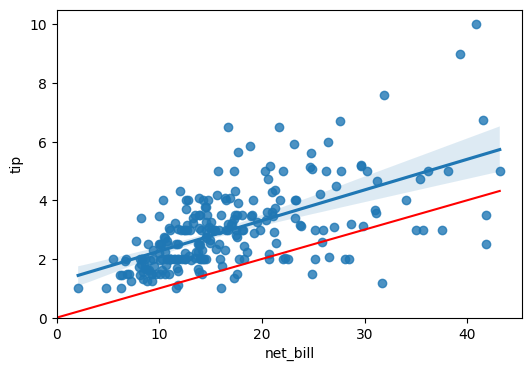

In [4]:
plt.figure(figsize=(6,4))
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

<Axes: xlabel='net_bill', ylabel='tip_pct'>

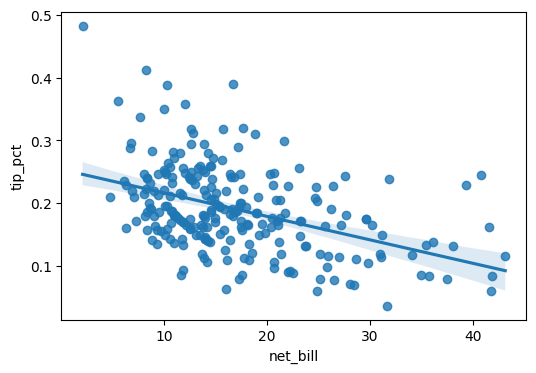

In [5]:
plt.figure(figsize=(6,4))
sns.regplot(y='tip_pct', x='net_bill', data = tips[tips['tip_pct']<.5])

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

<Axes: xlabel='net_bill'>

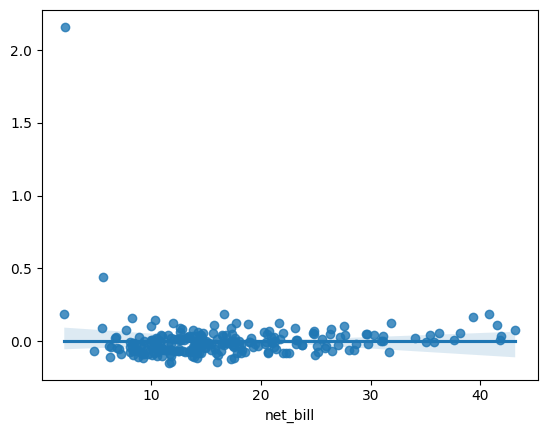

In [6]:
reg = smf.ols('tip_pct ~ net_bill', data=tips).fit()
#sns.scatterplot(x='net_bill', y=reg.resid, data=tips, alpha=.75)
sns.regplot(y=reg.resid, x='net_bill', data=tips)

In [7]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Fri, 22 Sep 2023   Prob (F-statistic):           1.52e-06
Time:                        18:59:41   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

o ajuste é feito de forma automática, não sei o que dizer a não ser que foi feito a partir de uma regressão linear na forma y=ax+b.

Como não houve mudança de escala, neste caso, podemos comparar diretamente os R2.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [16]:
# favor detalhar melhor esse exercício. Primeiramente, serve a quê este exercício?
# como calcular o R2? com alguma função ou vou ter que eu fazer o calculo matemático detalhado?
# qual o objetivo da comparação?
